## Objective:
    This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.
## Dataset:
    Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.


## 1. Data Exploration and Preprocessing:
    • Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
    • Handle missing values as per the best practices (imputation, removal, etc.).
    • Apply scaling techniques to numerical features:
    • Standard Scaling
    • Min-Max Scaling
    • Discuss the scenarios where each scaling technique is preferred and why.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [3]:
df=pd.read_csv('adult_with_headers.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [6]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.select_dtypes(['int','float']).columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [10]:
std=StandardScaler()

In [12]:
df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week','Net Gain']] = std.fit_transform(df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week','Net Gain']])

In [13]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Net Gain
0,0.030390,State-gov,-1.063569,Bachelors,1.134777,Never-married,Adm-clerical,Not-in-family,White,Male,0.148292,-0.216743,-0.035664,United-States,<=50K,0.159605
1,0.836973,Self-emp-not-inc,-1.008668,Bachelors,1.134777,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145975,-0.216743,-2.222483,United-States,<=50K,-0.133720
2,-0.042936,Private,0.245040,HS-grad,-0.420679,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145975,-0.216743,-0.035664,United-States,<=50K,-0.133720
3,1.056950,Private,0.425752,11th,-1.198407,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145975,-0.216743,-0.035664,United-States,<=50K,-0.133720
4,-0.776193,Private,1.408066,Bachelors,1.134777,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145975,-0.216743,-0.035664,Cuba,<=50K,-0.133720


In [ ]:
min_max=MinMaxScaler()

In [ ]:
df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week']] = min_max.fit_transform(df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week']])

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K


## 2. Encoding Techniques:
     •	Apply One-Hot Encoding to categorical variables with less than 5 categories.
     •	Use Label Encoding for categorical variables with more than 5 categories.
     •	Discuss the pros and cons of One-Hot Encoding and Label Encoding.


In [14]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [15]:
Label=LabelEncoder()
Ohe=OneHotEncoder()

In [16]:
for col in df.select_dtypes(['category','object']).columns:
    print(f"{col}:{df[col].value_counts()}")

workclass:workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education:education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64
marital_status:marital_status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation:occupation
Prof-specialty       4136
C

In [17]:
df['income']=Label.fit_transform(df['income'])

In [18]:
df['income'].value_counts()

,count
income,
0,24698
1,7839


In [20]:
df1=pd.DataFrame(Ohe.fit_transform(df[["sex"]]).toarray(),columns=["Female","Male"])

In [21]:
df['Female']=df1['Female']
df['Male']=df1['Male']

In [37]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Net Gain,Female,Male,capital_gain_log
0,0.030390,State-gov,-1.063569,Bachelors,1.134777,Never-married,Adm-clerical,Not-in-family,White,-0.145975,-0.216743,-0.035664,United-States,0.0,-0.13372,0.0,1.0,-0.157795
1,0.836973,Self-emp-not-inc,-1.008668,Bachelors,1.134777,Married-civ-spouse,Exec-managerial,Husband,White,-0.145975,-0.216743,-0.643114,United-States,0.0,-0.13372,0.0,1.0,-0.157795
2,-0.042936,Private,0.245040,HS-grad,-0.420679,Divorced,Handlers-cleaners,Not-in-family,White,-0.145975,-0.216743,-0.035664,United-States,0.0,-0.13372,0.0,1.0,-0.157795
3,1.056950,Private,0.425752,11th,-1.198407,Married-civ-spouse,Handlers-cleaners,Husband,Black,-0.145975,-0.216743,-0.035664,United-States,0.0,-0.13372,0.0,1.0,-0.157795
4,-0.776193,Private,1.408066,Bachelors,1.134777,Married-civ-spouse,Prof-specialty,Wife,Black,-0.145975,-0.216743,-0.035664,Cuba,0.0,-0.13372,1.0,0.0,-0.157795


In [23]:
df.drop(columns=['sex'],inplace=True)

## 3. Feature Engineering:
    • Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
    • Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.


In [11]:
df['Net Gain']=df['capital_gain']-df['capital_loss']

In [11]:
df['Net Gain'].head()

,Net Gain
0,2174
1,0
2,0
3,0
4,0


In [26]:
for col in df.select_dtypes(['int','float']).columns:
    print(f"{col}:{df[col].skew()}")

age:0.5576631514973126
fnlwgt:1.4477029083495345
education_num:-0.3095002599899899
capital_gain:11.94940283355146
capital_loss:4.592702423271812
hours_per_week:0.2287588778525042
income:1.21168744399569
Net Gain:11.867498922342286
Female:0.7194582579522283
Male:-0.7194582579522283
capital_gain_log:5.898421757252234


In [25]:
df['capital_gain_log']=np.log1p(df['capital_gain'])

## 4. Feature Selection:
    • Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
    • Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


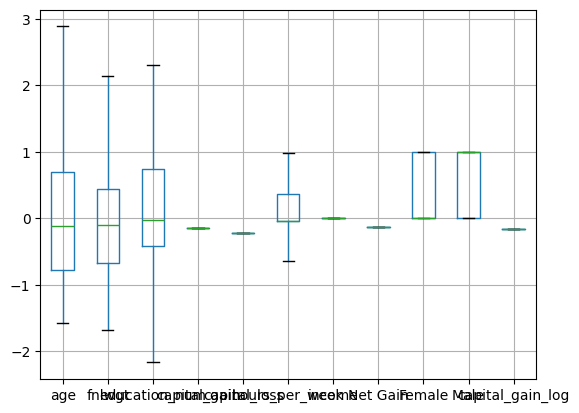

In [29]:
df.boxplot()
plt.show()

In [28]:
def outliercapping(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    df[col]=df[col].apply(lambda x:lower if x<lower else upper if x>upper else x)
for col in df.select_dtypes(['int','float']).columns:
    outliercapping(df,col)

In [30]:
!pip install --upgrade --force-reinstall numpy pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 305.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 813.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 23.9 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six

In [31]:
import ppscore as pps

In [39]:
pps.score(df,x='age',y='marital_status')

{'x': 'age',
 'y': 'marital_status',
 'ppscore': np.float64(0.3142205967129314),
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.3458,
 'model_score': np.float64(0.5513631143695997),
 'model': DecisionTreeClassifier()}